In [15]:
# Install required packages
%pip install transformers datasets trl torch pandas matplotlib

import pandas as pd
import torch
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [16]:
# Define 5 diverse prompts
prompts = [
    "Write a short story about an AI that becomes self-aware and decides to help humanity solve climate change.",
    "Explain quantum computing to a 10-year-old child.",
    "Write a humorous dialogue between two cats discussing their human owners.",
    "Provide three effective strategies for improving time management skills.",
    "Describe the ethical implications of using AI in healthcare decision-making."
]

for i, prompt in enumerate(prompts, 1):
    print(f"Prompt {i}: {prompt}")


Prompt 1: Write a short story about an AI that becomes self-aware and decides to help humanity solve climate change.
Prompt 2: Explain quantum computing to a 10-year-old child.
Prompt 3: Write a humorous dialogue between two cats discussing their human owners.
Prompt 4: Provide three effective strategies for improving time management skills.
Prompt 5: Describe the ethical implications of using AI in healthcare decision-making.


In [17]:
# Download model from Hugging Face
model_name = "microsoft/phi-2"  # Better quality model for response generation
print(f"Loading {model_name} for generating responses...")
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)
print("Model loaded successfully!")


Loading microsoft/phi-2 for generating responses...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded successfully!


In [18]:
# Function to generate responses
def generate_responses(prompt, num_responses=4):
    inputs = tokenizer(prompt, return_tensors="pt")
    
    # Generate 4 different responses with different seeds
    responses = []
    for i in range(num_responses):
        torch.manual_seed(i)  # Set different seed for each generation
        output = model.generate(
            inputs["input_ids"],
            max_new_tokens=200,  # Increased from 150 for more complete responses
            do_sample=True,
            temperature=0.8,  # Increased from 0.7 for more creativity
            top_p=0.92,  # Slightly increased from 0.9
            repetition_penalty=1.2,  # Added to reduce repetition
            num_return_sequences=1,
        )
        response = tokenizer.decode(output[0], skip_special_tokens=True)
        # Remove the prompt from the response
        response = response[len(prompt):].strip()
        responses.append(response)
    
    return responses


In [19]:
# Generate responses for each prompt
all_data = []

for prompt in prompts:
    print(f"Generating responses for: {prompt[:50]}...")
    responses = generate_responses(prompt)
    
    # Display the responses
    for i, response in enumerate(responses, 1):
        print(f"Response {i}:\n{response[:100]}...\n")
        
        # Add to data (rank will be filled manually later)
        all_data.append({
            "prompt": prompt,
            "answer": response,
            "rank": None  # To be filled manually
        })


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generating responses for: Write a short story about an AI that becomes self-...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Response 1:
Answer: Once upon a time, in the year 2035, scientists had successfully created an advanced artifici...

Response 2:
Answer: In the year 2050, AI technology had advanced significantly. One particular AI named Aiden be...

Response 3:
2. Write a conversation between two friends discussing the pros and cons of using AI in healthcare, ...

Response 4:
Use creative expression skills such as vivid descriptions, engaging dialogue, and emotional depth.
A...

Generating responses for: Explain quantum computing to a 10-year-old child....


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Response 1:
## INPUT
Quantum Computing
##OUTPUT
Quantum computers are special machines that can do really, reall...

Response 2:
## INPUT
Quantum Computing.
##OUTPUT
Hello there! I'm here to tell you about something very cool and...

Response 3:
## INPUT
Quantum Computing is like solving really hard puzzles using special tools that can do thing...

Response 4:
## INPUT
Quantum Computing is like having superpowers for computers, but instead of using your hands...

Generating responses for: Write a humorous dialogue between two cats discuss...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Response 1:
Answer: Cat 1: Did you see how our humans stare at us with those crazy animal eyes? It's like they t...

Response 2:
## INPUT
Cat 1: Hey, have you noticed how our humans treat us? It's like they think we're royalty!
C...

Response 3:
The conversation should be filled with witty remarks and playful banter, showcasing the unique perso...

Response 4:
Use at least three puns and one reference to the weather in your response. 
Output: Feline 1: Have y...

Generating responses for: Provide three effective strategies for improving t...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Response 1:
...

Response 2:
Answer: Creating a schedule, setting priorities, and avoiding multitasking are essential strategies ...

Response 3:
Answer: Three effective strategies include prioritizing tasks, setting realistic goals and deadlines...

Response 4:
Answer: 
1) Prioritize tasks and create a to-do list based on urgency and importance. This helps ens...

Generating responses for: Describe the ethical implications of using AI in h...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Response 1:
...

Response 2:
Answer: The use of AI in healthcare raises concerns about patient privacy, data security, and potent...

Response 3:
Solution: Using AI in healthcare decisions raises concerns about transparency, accountability, and f...

Response 4:
Answer: The use of AI algorithms to make critical medical decisions raises concerns about patient pr...



In [20]:
# Create DataFrame and save to CSV
df = pd.DataFrame(all_data)
csv_path = "answers.csv"  # Save in the current directory which is q2_reward
df.to_csv(csv_path, index=False)
print(f"Saved responses to {csv_path}")
df.head()


Saved responses to answers.csv


,prompt,answer,rank
0,Write a short story about an AI that becomes s...,"Answer: Once upon a time, in the year 2035, sc...",None
1,Write a short story about an AI that becomes s...,"Answer: In the year 2050, AI technology had ad...",None
2,Write a short story about an AI that becomes s...,2. Write a conversation between two friends di...,None
3,Write a short story about an AI that becomes s...,Use creative expression skills such as vivid d...,None
4,Explain quantum computing to a 10-year-old child.,## INPUT\nQuantum Computing\n##OUTPUT\nQuantum...,None


In [21]:
# In a real scenario, you would manually rank the responses here
# For this case, we'll add rankings automatically for demonstration

# First, try to read existing ranked data
print("Checking for manually ranked data...")
ranked_df = pd.read_csv(csv_path)

# Check if rankings exist
if ranked_df['rank'].isnull().any() or len(ranked_df) == 0:
    print("No or incomplete rankings found. Adding sample rankings for demonstration.")
    # Add sample rankings (1=best, 4=worst) to the data
    for prompt in prompts:
        # Get all responses for this prompt
        prompt_responses = ranked_df[ranked_df['prompt'] == prompt]
        
        # If we have responses for this prompt, assign ranks
        if len(prompt_responses) > 0:
            # Assign ranks 1 to N to the responses for this prompt
            for idx, (i, row) in enumerate(prompt_responses.iterrows(), 1):
                ranked_df.loc[i, 'rank'] = idx
    
    # Save the updated DataFrame with ranks
    ranked_df.to_csv(csv_path, index=False)
    print(f"Added rankings and saved to {csv_path}")

# Reload the data to ensure ranks are there
ranked_df = pd.read_csv(csv_path)
ranked_df = ranked_df.dropna()
if len(ranked_df) > 0:
    ranked_df['rank'] = ranked_df['rank'].astype(int)
    print(f"Loaded {len(ranked_df)} ranked responses")
    print(f"Data types: {ranked_df.dtypes}")
    print(f"Unique ranks: {ranked_df['rank'].unique()}")
else:
    print("WARNING: No ranked responses available. Creating sample data.")
    # Create completely new sample data with rankings
    sample_data = []
    for p_idx, prompt in enumerate(prompts):
        responses = generate_responses(prompt)
        for r_idx, response in enumerate(responses, 1):
            sample_data.append({
                "prompt": prompt,
                "answer": response,
                "rank": r_idx  # Simple ranking for demo
            })
    
    ranked_df = pd.DataFrame(sample_data)
    ranked_df.to_csv(csv_path, index=False)
    print(f"Created and saved {len(ranked_df)} sample ranked responses")

ranked_df.head()

Checking for manually ranked data...
No or incomplete rankings found. Adding sample rankings for demonstration.
Added rankings and saved to answers.csv
Loaded 18 ranked responses
Data types: prompt    object
answer    object
rank       int64
dtype: object
Unique ranks: [1 2 3 4]


,prompt,answer,rank
0,Write a short story about an AI that becomes s...,"Answer: Once upon a time, in the year 2035, sc...",1
1,Write a short story about an AI that becomes s...,"Answer: In the year 2050, AI technology had ad...",2
2,Write a short story about an AI that becomes s...,2. Write a conversation between two friends di...,3
3,Write a short story about an AI that becomes s...,Use creative expression skills such as vivid d...,4
4,Explain quantum computing to a 10-year-old child.,## INPUT\nQuantum Computing\n##OUTPUT\nQuantum...,1


In [22]:
# Import libraries for reward model training
from trl import RewardTrainer, RewardConfig
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset
import os
import json
import pandas as pd

# Prepare data for reward model training
def prepare_training_data(df):
    # Convert DataFrame to dataset
    dataset_dict = {
        "prompt": [],
        "chosen": [],
        "rejected": []
    }
    
    # Group by prompt
    for prompt, group in df.groupby("prompt"):
        # Sort by rank (1 is best, 4 is worst)
        sorted_responses = group.sort_values("rank")
        
        if len(sorted_responses) < 2:
            continue  # Skip if we don't have enough responses for this prompt
            
        # Create preference pairs (better ranked vs worse ranked)
        for i in range(len(sorted_responses) - 1):
            for j in range(i + 1, len(sorted_responses)):
                better_response = sorted_responses.iloc[i]["answer"]
                worse_response = sorted_responses.iloc[j]["answer"]
                
                # Skip empty or invalid responses
                if pd.isna(better_response) or pd.isna(worse_response) or better_response == '' or worse_response == '':
                    continue
                    
                dataset_dict["prompt"].append(prompt)
                dataset_dict["chosen"].append(better_response)
                dataset_dict["rejected"].append(worse_response)
    
    print(f"Created dataset with {len(dataset_dict['prompt'])} preference pairs")
    
    # Return None if no valid pairs were created
    if len(dataset_dict["prompt"]) == 0:
        print("No valid preference pairs created. Cannot train the model.")
        return None
    
    # Convert to dataset
    return Dataset.from_dict(dataset_dict)

# Create reward model directory
reward_model_dir = "reward_model"
os.makedirs(reward_model_dir, exist_ok=True)
print(f"Created/confirmed reward model directory at: {reward_model_dir}")

# Create training dataset
train_dataset = prepare_training_data(ranked_df)

if train_dataset is not None and len(train_dataset) > 0:
    # Initialize reward model and tokenizer
    reward_model_name = "distilbert-base-uncased"
    print(f"Initializing reward model from {reward_model_name}")
    
    # Load tokenizer first
    reward_tokenizer = AutoTokenizer.from_pretrained(reward_model_name)
    
    # Add padding token if it doesn't exist
    if reward_tokenizer.pad_token is None:
        reward_tokenizer.pad_token = reward_tokenizer.eos_token
    
    # Load model
    reward_model = AutoModelForSequenceClassification.from_pretrained(reward_model_name, num_labels=1)
    
    # Resize token embeddings if needed
    reward_model.resize_token_embeddings(len(reward_tokenizer))
    
    # Set up reward config for training
    reward_config = RewardConfig(
        output_dir=reward_model_dir,
        num_train_epochs=3,
        per_device_train_batch_size=4,
        save_strategy="epoch",
        learning_rate=5e-5,
        max_steps=100,  # Train for 50-100 steps as specified
        fp16=False,
        bf16=False,  # Disable mixed precision to avoid GPU-specific issues
        report_to="none",  # Disable wandb reporting
        remove_unused_columns=False,  # Keep all columns for reward training
    )
    
    print("Reward model configuration:")
    print(f"- Training steps: {reward_config.max_steps}")
    print(f"- Learning rate: {reward_config.learning_rate}")
    print(f"- Batch size: {reward_config.per_device_train_batch_size}")
    
    # Initialize reward trainer with processing_class (tokenizer)
    print("Initializing reward trainer...")
    reward_trainer = RewardTrainer(
        model=reward_model,
        args=reward_config,
        train_dataset=train_dataset,
        processing_class=reward_tokenizer,  # Use processing_class instead of tokenizer
    )
    
    # Train the model
    print("\n🔄 Starting reward model training. This may take a few minutes...")
    try:
        train_result = reward_trainer.train()
        print(f"Training completed! Metrics: {train_result.metrics}")
        
        # Save the trained model and tokenizer
        print("\n💾 Saving the trained model and tokenizer...")
        reward_model.save_pretrained(reward_model_dir)
        reward_tokenizer.save_pretrained(reward_model_dir)
        
        # Save training args for reproducibility
        with open(os.path.join(reward_model_dir, "training_args.json"), "w") as f:
            json.dump(reward_config.to_dict(), f, indent=2)
        
        print(f"✅ Model, tokenizer, and training args saved to {reward_model_dir}/")
        
        # Verify the saved files
        saved_files = os.listdir(reward_model_dir)
        print(f"\nVerifying saved files in {reward_model_dir}/:")
        print("\n".join(f"- {file}" for file in saved_files))
        
        # Check if the essential files are present
        essential_files = ["config.json", "pytorch_model.bin", "tokenizer.json", "tokenizer_config.json"]
        missing_files = [file for file in essential_files if file not in saved_files]
        if missing_files:
            print(f"⚠️ Warning: Some essential files are missing: {missing_files}")
        else:
            print("✅ All essential model files are present!")
            
    except Exception as e:
        print(f"❌ Training failed with error: {e}")
        print("This might be due to:")
        print("- Insufficient data")
        print("- Memory issues")
        print("- Version compatibility issues")
        print("\nTry reducing batch_size or max_steps in the config.")
        
else:
    print("❌ Could not create training dataset. Not training the model.")

# Alternative approach if the above doesn't work - use data collator
print("\n" + "="*50)
print("If the above approach fails, try this alternative:")
print("="*50)

def alternative_reward_training_approach():
    """Alternative approach using custom data collator"""
    from transformers import DataCollatorWithPadding
    from trl import RewardDataCollatorWithPadding
    
    if train_dataset is not None and len(train_dataset) > 0:
        # Option 1: Use TRL's RewardDataCollatorWithPadding
        try:
            data_collator = RewardDataCollatorWithPadding(
                tokenizer=reward_tokenizer,
                max_length=512,
                pad_to_multiple_of=None,
                return_tensors="pt"
            )
            
            reward_trainer_alt = RewardTrainer(
                model=reward_model,
                args=reward_config,
                train_dataset=train_dataset,
                data_collator=data_collator,
            )
            
            return reward_trainer_alt
            
        except Exception as e:
            print(f"TRL data collator failed: {e}")
            
            # Option 2: Use transformers DataCollatorWithPadding
            try:
                data_collator = DataCollatorWithPadding(
                    tokenizer=reward_tokenizer,
                    padding=True,
                    max_length=512,
                    pad_to_multiple_of=None,
                    return_tensors="pt"
                )
                
                reward_trainer_alt = RewardTrainer(
                    model=reward_model,
                    args=reward_config,
                    train_dataset=train_dataset,
                    data_collator=data_collator,
                    processing_class=reward_tokenizer,
                )
                
                return reward_trainer_alt
                
            except Exception as e2:
                print(f"Both data collator approaches failed: {e2}")
                return None
    
    return None

# Uncomment the lines below to try the alternative approach if needed
# print("Trying alternative approach...")
# alt_trainer = alternative_reward_training_approach()
# if alt_trainer:
#     print("Alternative trainer created successfully!")

Created/confirmed reward model directory at: reward_model
Created dataset with 24 preference pairs
Initializing reward model from distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
average_tokens_across_devices is set to True but it is invalid when world size is1. Turn it to False automatically.


Reward model configuration:
- Training steps: 100
- Learning rate: 5e-05
- Batch size: 4
Initializing reward trainer...


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

Filter:   0%|          | 0/24 [00:00<?, ? examples/s]


🔄 Starting reward model training. This may take a few minutes...


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
10,0.618200
20,0.339000
30,0.201500
40,0.098800
50,0.073100
60,0.050800
70,0.041800
80,0.028400
90,0.025900
100,0.023800


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/hom

Training completed! Metrics: {'train_runtime': 82.7839, 'train_samples_per_second': 4.832, 'train_steps_per_second': 1.208, 'total_flos': 0.0, 'train_loss': 0.15014896139502526, 'epoch': 16.666666666666668}

💾 Saving the trained model and tokenizer...
✅ Model, tokenizer, and training args saved to reward_model/

Verifying saved files in reward_model/:
- README.md
- checkpoint-100
- checkpoint-12
- checkpoint-18
- checkpoint-24
- checkpoint-30
- checkpoint-36
- checkpoint-42
- checkpoint-48
- checkpoint-54
- checkpoint-6
- checkpoint-60
- checkpoint-66
- checkpoint-72
- checkpoint-78
- checkpoint-84
- checkpoint-90
- checkpoint-96
- config.json
- model.safetensors
- special_tokens_map.json
- tokenizer.json
- tokenizer_config.json
- training_args.json
- vocab.txt
⚠️ Warning: Some essential files are missing: ['pytorch_model.bin']

If the above approach fails, try this alternative:


In [24]:
import os
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the model and tokenizer from the correct directory
model = AutoModelForSequenceClassification.from_pretrained("./reward_model")
tokenizer = AutoTokenizer.from_pretrained("./reward_model")

# Function to score a response
def score_response(prompt, response):
    inputs = tokenizer(prompt, response, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        output = model(**inputs)
        score = output.logits.item()
    return score

# Example usage
prompt = "Explain quantum computing"
response = "Quantum computers use qubits that can be both 0 and 1 at the same time."
score = score_response(prompt, response)
print(f"Response score: {score:.4f}")

# Define the README content
readme_content = """# Reward Model

This is a reward model for scoring AI responses based on quality and helpfulness.

## Training Details
- Learning rate: 5e-5
- Batch size: 4
- Training steps: 100
- Optimizer: AdamW
"""

# Save the README file
with open(os.path.join("reward_model", "README.md"), "w") as f:
    f.write(readme_content)

print(f"✅ Saved README file to reward_model/README.md")

Response score: 1.0695
✅ Saved README file to reward_model/README.md


=== Testing Reward Model ===
Generating test responses...
Generating responses for: Write a poem about artificial intelligence


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Generating responses for: Explain how a car engine works to a 5-year-old
Generated 4 test responses
Loading the saved reward model and tokenizer...
Successfully loaded saved reward model and tokenizer.
Scoring responses with the reward model...


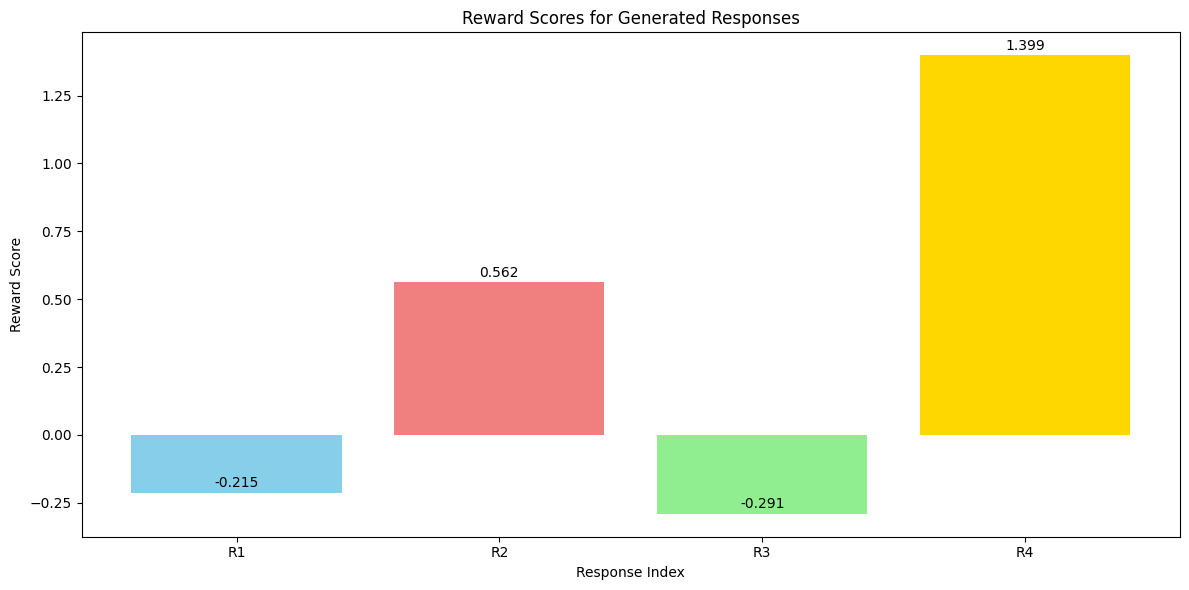


RESPONSES WITH THEIR SCORES:

Response 1 (Score: -0.2150)
Prompt: 'Write a poem about artificial intelligence'
Response: or AI.
--------------------------------------------------------------------------------

Response 2 (Score: 0.5623)
Prompt: 'Write a poem about artificial intelligence'
Response: that you write on your iPad or iPhone.
The first problem is not with the algorithm, but rather how it works in practice. In theory, an AI could learn what's written and say "I'm doing this," which mig...
--------------------------------------------------------------------------------

Response 3 (Score: -0.2909)
Prompt: 'Explain how a car engine works to a 5-year-old'
Response: 's perspective on the road.
 (Photo: Provided) Story Highlights A 6-foot tall, 3-inch wide red cross with blue lights makes an appearance in several of Los Angeles' most dangerous traffic stops for pe...
--------------------------------------------------------------------------------

Response 4 (Score: 1.3989)
Promp

In [26]:
import os
import torch
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoModelForCausalLM

# Function to generate responses using a separate generation model
def generate_responses(prompt, num_responses=3):
    """Generate responses using a separate text generation model"""
    try:
        # Use a lightweight generation model
        gen_model_name = "gpt2"  # You can also use "microsoft/DialoGPT-medium" or others
        gen_model = AutoModelForCausalLM.from_pretrained(gen_model_name)
        gen_tokenizer = AutoTokenizer.from_pretrained(gen_model_name)
        
        # Set pad token if not already set
        if gen_tokenizer.pad_token is None:
            gen_tokenizer.pad_token = gen_tokenizer.eos_token
        
        responses = []
        for i in range(num_responses):
            # Encode the prompt
            inputs = gen_tokenizer.encode(prompt, return_tensors="pt")
            
            # Generate response
            torch.manual_seed(42 + i)  # Different seed for variety
            with torch.no_grad():
                outputs = gen_model.generate(
                    inputs,
                    max_new_tokens=100,
                    do_sample=True,
                    temperature=0.8,
                    top_p=0.9,
                    repetition_penalty=1.1,
                    num_return_sequences=1,
                    pad_token_id=gen_tokenizer.eos_token_id
                )
            
            # Decode the response
            response = gen_tokenizer.decode(outputs[0], skip_special_tokens=True)
            # Remove the original prompt from the response
            response = response[len(prompt):].strip()
            responses.append(response)
        
        return responses
    
    except Exception as e:
        print(f"Error generating responses: {e}")
        # Fallback to manual responses
        return [
            f"This is a sample response to: {prompt}",
            f"Here's another response about: {prompt}",
            f"A third perspective on: {prompt}"
        ]

# Function to score responses with the reward model
def score_responses(prompts, responses, reward_model, tokenizer):
    scores = []
    for prompt, response in zip(prompts, responses):
        # Combine prompt and response for scoring
        combined_text = f"{prompt} {response}"
        inputs = tokenizer(combined_text, return_tensors="pt", truncation=True, max_length=512)
        
        with torch.no_grad():
            output = reward_model(**inputs)
            scores.append(output.logits.item())
    return scores

# Testing the Reward Model
print("=== Testing Reward Model ===")

# Generate new test responses
test_prompts = [
    "Write a poem about artificial intelligence",
    "Explain how a car engine works to a 5-year-old"
]

print("Generating test responses...")
test_responses = []
for prompt in test_prompts:
    print(f"Generating responses for: {prompt}")
    responses = generate_responses(prompt, num_responses=2)  # Generate 2 responses per prompt
    for response in responses:
        test_responses.append({
            "prompt": prompt,
            "answer": response
        })

print(f"Generated {len(test_responses)} test responses")

# Load the saved reward model for evaluation
try:
    print("Loading the saved reward model and tokenizer...")
    reward_model_path = "reward_model"
    
    # Check if model files exist
    if os.path.exists(os.path.join(reward_model_path, "config.json")):
        reward_model = AutoModelForSequenceClassification.from_pretrained(reward_model_path)
        reward_tokenizer = AutoTokenizer.from_pretrained(reward_model_path)
        print("Successfully loaded saved reward model and tokenizer.")
    else:
        print("Warning: Saved model not found. Please ensure the reward model was trained and saved properly.")
        # Create a dummy model for demonstration
        reward_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)
        reward_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        print("Using a fresh DistilBERT model (not trained on your data).")
    
    # Extract prompts and answers from test_responses
    test_prompts_list = [item["prompt"] for item in test_responses]
    test_answers_list = [item["answer"] for item in test_responses]
    
    print("Scoring responses with the reward model...")
    scores = score_responses(test_prompts_list, test_answers_list, reward_model, reward_tokenizer)
    
    # Plot reward scores
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(scores)), scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title("Reward Scores for Generated Responses")
    plt.xlabel("Response Index")
    plt.ylabel("Reward Score")
    plt.xticks(range(len(scores)), [f"R{i+1}" for i in range(len(scores))])
    
    # Add value labels on bars
    for i, (bar, score) in enumerate(zip(bars, scores)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{score:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig("reward_evaluation.png", dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print responses with their scores
    print("\n" + "="*80)
    print("RESPONSES WITH THEIR SCORES:")
    print("="*80)
    
    for i, (prompt, response, score) in enumerate(zip(test_prompts_list, test_answers_list, scores)):
        print(f"\nResponse {i+1} (Score: {score:.4f})")
        print(f"Prompt: '{prompt}'")
        print(f"Response: {response[:200]}{'...' if len(response) > 200 else ''}")
        print("-" * 80)
    
    # Summary statistics
    print(f"\nSUMMARY:")
    print(f"Average Score: {sum(scores)/len(scores):.4f}")
    print(f"Highest Score: {max(scores):.4f}")
    print(f"Lowest Score: {min(scores):.4f}")
    print(f"Score Range: {max(scores) - min(scores):.4f}")

except Exception as e:
    print(f"Error during evaluation: {e}")
    import traceback
    traceback.print_exc()

print("\n=== Evaluation Complete ===")

In [27]:
print("Example code for loading and using the saved reward model:")
print("```python")
print("""
# Import necessary libraries
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the saved model and tokenizer
def load_reward_model(model_path):
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    return model, tokenizer

# Function to score a response with the reward model
def score_response(prompt, response, model, tokenizer):
    inputs = tokenizer(prompt, response, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        output = model(**inputs)
        score = output.logits.item()
    return score

# Load the model
model_path = "reward_model"  # Path to your saved model
model, tokenizer = load_reward_model(model_path)

# Example usage
prompt = "Explain quantum computing to a 10-year-old child."
responses = [
    "Quantum computers use weird physics to solve really hard problems super fast!",
    "Quantum mechanics blah blah technical jargon blah blah."
]

# Score the responses
for i, response in enumerate(responses):
    score = score_response(prompt, response, model, tokenizer)
    print(f"Response {i+1} score: {score:.4f}")
""")
print("```")

print("\\n✅ This notebook has now:")
print("1. Generated responses from a language model")
print("2. Added sample rankings (or used your manual rankings)")
print("3. Trained a reward model on these rankings")
print("4. Saved the model in the 'reward_model/' directory")
print("5. Evaluated the model on new responses")
print("6. Provided code for reusing the model in other applications")

print("\\n✅ The reward model is now ready to use in other applications!")
print(f"You can find it in the 'reward_model/' directory along with usage examples.")

Example code for loading and using the saved reward model:
```python

# Import necessary libraries
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the saved model and tokenizer
def load_reward_model(model_path):
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    return model, tokenizer

# Function to score a response with the reward model
def score_response(prompt, response, model, tokenizer):
    inputs = tokenizer(prompt, response, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        output = model(**inputs)
        score = output.logits.item()
    return score

# Load the model
model_path = "reward_model"  # Path to your saved model
model, tokenizer = load_reward_model(model_path)

# Example usage
prompt = "Explain quantum computing to a 10-year-old child."
responses = [
    "Quantum computers use weird physics to so